In [22]:
#https://analyticsindiamag.com/effective-way-to-replace-correlation-with-predictive-power-scorepps-in-python/
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12987 sha256=b3b910323f98aaf3bbc955829e5c9465f49cccba89c80dab0d7d87c1807c5ac0
  Stored in directory: /root/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore


In [26]:
import ppscore as pps
import pandas as pd

df = pd.read_csv('Advertising.csv')
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [28]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
pps.score(df, "sales", "TV")

{'baseline_score': 75.0755,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 50.852666666666664,
 'ppscore': 0.3226463138218638,
 'x': 'sales',
 'y': 'TV'}

In [33]:
pps.score(df, "sales", "radio")

{'baseline_score': 12.969000000000001,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 12.428875000000001,
 'ppscore': 0.041647389929832634,
 'x': 'sales',
 'y': 'radio'}

In [35]:
pps.predictors(df, "sales")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,TV,sales,0.147948,regression,True,mean absolute error,4.2025,3.580750,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,radio,sales,0.041404,regression,True,mean absolute error,4.2025,4.028500,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,newspaper,sales,0.000000,regression,True,mean absolute error,4.2025,5.190083,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


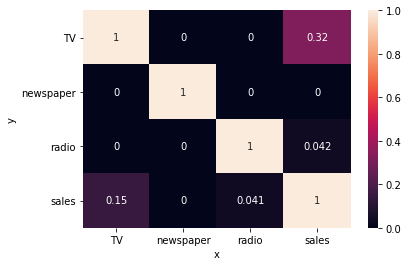

In [36]:
import seaborn as sns
matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True)

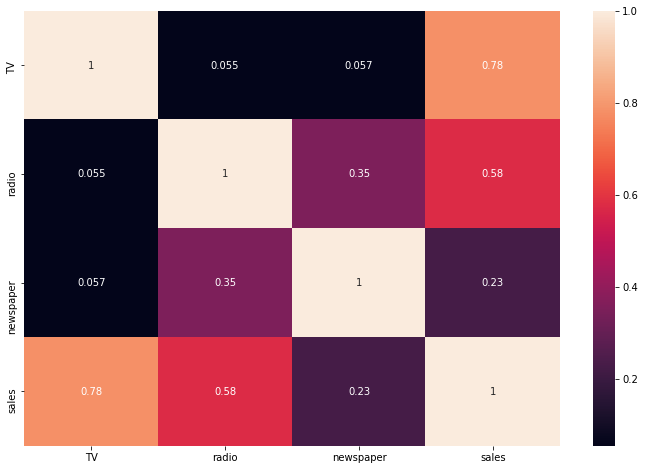

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)